# Installation
## Installation on Colab

To get started we just need to install 
the `d2l` package that in order to encapsulate
frequently used functions and classes

```bash
!pip install -U d2l
```

## Local Installation

It is reccommended to create a conda environment

MacOSX:

```bash
sh Miniconda3-latest-MacOSX-x86_64.sh -b
```

Linux:
```bash
sh Miniconda3-latest-Linux-x86_64.sh -b
```

Close and reopen your current shell. Create 
a new environment as follows:

```bash
conda create --name ml_talks python=3.8 -y
```

Activate the `ml_talks` environment:

```bash
conda activate ml_talks
```


Install the deep learning framework (PyTorch)

```bash
pip install torch torchvision
```

Install the `d2l` package that in order to encapsulate
frequently used functions and classes

```bash
pip install -U d2l
```

### GPU Support
If you have a GPU and CUDA already set up, the installation above will automatically use the GPU. Otherwise, you will need to install CUDA.

# Tensors

To start, we introduce the $n$-dimensional array, which is also called the *tensor*.

Tensors are similar to NumPy's `ndarray` with
a few killer features:
1) GPU is well-supported to accelerate the computation
whereas NumPy only supports CPU computation.
2) The tensor class supports automatic differentiation.

When our vectors represent examples from our dataset,
their values hold some real-world significance.
For example, if we were training a model to predict
the risk that a loan defaults,
we might associate each applicant with a vector
whose components correspond to their income,
length of employment, number of previous defaults, and other factors.
If we were studying the risk of heart attacks hospital patients potentially face,
we might represent each patient by a vector
whose components capture their most recent vital signs,
cholesterol levels, minutes of exercise per day, etc.

Let's create our first tensor:

In [1]:
import torch
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

Compute its shape:

In [5]:
x.shape

torch.Size([12])

Extract its value as a NumPy `ndarray`:

In [3]:
a = x.numpy()
a

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
      dtype=float32)

Go back to a tensor:

In [4]:
b = torch.from_numpy(a)
type(a), type(b)

(numpy.ndarray, torch.Tensor)

Move tensor to GPU

In [6]:
y = x.clone().to(device='cuda')
x, y

(tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
        device='cuda:0'))

## Scalars

A scalar is represented by a tensor with just one element:

In [7]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x, y

(tensor(3.), tensor(2.))

## Vectors

You can think of a vector as simply a list of scalar values.

In [8]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

 We call these values the *elements* (*entries* or *components*) of the vector, which we can access via indexing and slicing:

In [9]:
x[1], x[-1], x[1:3]

(tensor(1), tensor(3), tensor([1, 2]))

## Matrices

Just as vectors generalize scalars from order zero to order one,
matrices generalize vectors from order one to order two. You can now think of matrices as a list of vectors.

We can create an $5 \times 4$ matrix as follows:

In [10]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

Indexing and slicing generalizes to matrices as well

In [11]:
A[0:2, :]

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

## Tensors

Just as vectors generalize scalars, and matrices generalize vectors, we can build data structures with even more axes.

Vectors are first-order tensors, and matrices are second-order tensors. You can now think of third-order tensors as list of matrices and so on! 

Tensors will become important when we start working with images,
 which arrive as $n$-dimensional arrays with 3 axes corresponding to the height, width, and a *channel* axis for stacking the color channels (red, green, and blue).

In [14]:
X = torch.arange(75).reshape(3, 5, 5)
X

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24]],

        [[25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59],
         [60, 61, 62, 63, 64],
         [65, 66, 67, 68, 69],
         [70, 71, 72, 73, 74]]])

Tensors can also contain logical statements:

In [17]:
Y = X < 30
Y

tensor([[[ True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True],
         [ True,  True,  True,  True,  True]],

        [[ True,  True,  True,  True,  True],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False]],

        [[False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False],
         [False, False, False, False, False]]])

# Linear Algebra

## Elementwise operations

Given any two tensors with the same shape,
the result of any binary elementwise operation
will be a tensor of that same shape.

For example, adding or multiplying two matrices of the same shape
performs elementwise addition over these two matrices.

In [18]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = torch.ones(5, 4)
A, B, A + B, A * B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.],
         [13., 14., 15., 16.],
         [17., 18., 19., 20.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

## Broadcasting Mechanism

Under certain conditions, even when shapes differ, we can still perform elementwise operations
by invoking the *broadcasting mechanism*.
This mechanism works in the following way:
first, expand one or both arrays
by copying elements appropriately
so that after this transformation,
the two tensors have the same shape.
Second, carry out the elementwise operations
on the resulting arrays.

In most cases, we broadcast along an axis where an array
initially only has length 1, such as in the following example:

In [19]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

The sum with the resulting shape is

In [14]:
c = a + b
c, c.shape

(tensor([[0, 1],
         [1, 2],
         [2, 3]]),
 torch.Size([3, 2]))

## Reduction

One useful operation that we can perform with arbitrary tensors
is to calculate the sum or the mean of their elements along one or more dimensions.

In code, we can just call the function for calculating the sum or the mean. It reduces a tensor to a scalar:

In [20]:
A, A.sum(), A.mean()

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor(190.),
 tensor(9.5000))

We can also reduce specific dimensions only by specifying the axes along which the tensor is reduced:

In [16]:
A_sum_axis0 = A.sum(axis=0)
A, A.shape, A_sum_axis0, A_sum_axis0.shape

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 torch.Size([5, 4]),
 tensor([40., 45., 50., 55.]),
 torch.Size([4]))

## Dot Product

The *dot product* of two vectors (of same length!) is a sum over the products of the elements at the same position

In [21]:
x = torch.arange(4, dtype = torch.float32)
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In fact we can easily chack the following:

In [22]:
torch.sum(x * y) == torch.dot(x, y)

tensor(True)

## Tensor Multiplication

Tensor multiplication generalizes the dot product to tensors of arbitrary order 

In [25]:
A = torch.arange(3 * 2).reshape((3, 1, 2))
B = torch.arange(2 * 5).reshape((2, 5))
C = torch.matmul(A, B)
C, C.shape

(tensor([[[ 5,  6,  7,  8,  9]],
 
         [[15, 20, 25, 30, 35]],
 
         [[25, 34, 43, 52, 61]]]),
 torch.Size([3, 1, 5]))

The result is simply a tensor whose elements are the results of vector-vector dot products:

In [27]:
torch.dot(A[1, 0, :], B[:, 3]), C[1, 0, 3]

(tensor(30), tensor(30))

## Vectorization

Vectorization is the idea of packing for loops in tensor multiplications to make more efficient calculations.

## Norms

Informally, the norm of a tensor tells us how *big* a tensor is.
The notion of *size* under consideration here
concerns not dimensionality
but rather the magnitude of the components. Similarly the norm of the difference between two tensors, is a measure of how different two tensors are

Norms are always positive and vanish only when all elements of a tensor vanish.

The Euclidean distance is a norm. Specifically it is the $L_2$ norm. Suppose that the elements in the $n$-dimensional vector
$\mathbf{x}$ are $x_1, \ldots, x_n$.

**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$**

We can calculate the $L_2$ norm of a vector as follows.


In [28]:
u = torch.tensor([3.0, -4.0])
n = torch.norm(u)
n, n == torch.sqrt(torch.sum(u ** 2))

(tensor(5.), tensor(True))

### Norms and Objectives

In deep learning, we are often trying to solve optimization problems:
*maximize* the probability assigned to observed data;
*minimize* the distance between predictions
and the ground-truth observations.

Assign vector representations to items (like words, products, or news articles)
such that the distance between similar items is minimized,
and the distance between dissimilar items is maximized.
# Calculus

In deep learning, we *train* models, updating them successively
so that they get better and better as they see more and more data.
Usually, getting better means minimizing a *loss function*,
a score that answers the question "how *bad* is our model?"

This question is more subtle than it appears. We really care about producing a model that performs well on data
that we have never seen before, 
but we can only fit the model to data that we can actually see.

Thus we can decompose the task of fitting models into two key concerns:
(i) *optimization*: the process of fitting our models to observed data;
(ii) *generalization*: produce models whose validity extends
beyond the exact set of data examples used to train them.


## Derivatives and Differentiation

Suppose that we have a function $f: \mathbb{R} \rightarrow \mathbb{R}$,
whose input and output are both scalars. The *derivative* of $f$ is defined as:


**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h},$$**


To illustrate derivatives, let us experiment with an example. Define $u = f(x) = 3x^2-4x$.


In [29]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

Numerical evaluation of the derivative at $x=1$ (the derivative $u'$ is $2$ when $x=1$)

In [30]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


This derivative is also the slope of the tangent line
to the curve $u = f(x)$ when $x = 1$. Let's visualize such an interpretation of th ederivative:

In [33]:
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
    
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

Now we can [**plot the function $u = f(x)$ and its tangent line $y = 2x - 3$ at $x=1$**], where the coefficient $2$ is the slope of the tangent line.

/tmp/ipykernel_3169592/1347612540.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


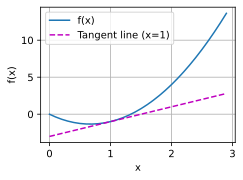

In [34]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

Similarly, the derivative tells us how to move locally around $x=1$ such that the value of th efunction $f(x)$ increases or decreases.

# Automatic Differentiation

Differentiation is a crucial step in nearly all deep learning optimization algorithms, and it is required to determine the updates to model parameters during training.

Deep learning frameworks provide efficient routines to automatically calculate derivatives, i.e., *automatic differentiation*.


## A Simple Example

As a toy example, say that we are interested
in differentiating the function
$y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to the vector $\mathbf{x}$.
To start, let us create the variable `x` and assign it an initial value.


In [35]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

The instructions in the next cell will allocate new memory to store the gradients with respect to the variable `x`. (Note that a gradient of a scalar-valued function
with respect to a vector $\mathbf{x}$
is itself vector-valued and has the same shape as $\mathbf{x}$.)

In [36]:
x.requires_grad_(True)  # Same as `x = torch.arange(4.0, requires_grad=True)`
x.grad  # The default value is None
x

tensor([0., 1., 2., 3.], requires_grad=True)

Now let us calculate $y$:

In [37]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

Since `x` is a vector of length 4,
an dot product of `x` and `x` is performed,
yielding the scalar output that we assign to `y`.
Next, we can automatically calculate the gradient of `y`
with respect to each component of `x`
by calling the function for backpropagation (gradient computation) and printing the gradient.

In [38]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

Let's check the result. The gradient of the function $y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to $\mathbf{x}$ should be $4\mathbf{x}$:

In [29]:
x.grad == 4 * x

tensor([True, True, True, True])

## Detaching Computation

Sometimes, we might want to treat some calculations as constant and remove them from the calculation of gradients.

The following backpropagation function computes
the partial derivative of `z = u * x` with respect to `x` while treating `u` as a constant,
instead of the partial derivative of `z = x * x * x` with respect to `x`.

In [31]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

## Computing the Gradient of Python Control Flow

Automatic differentiation can still be used to calculate gradients through a maze of Python control flow (e.g., conditionals, loops, and arbitrary function calls).
 
In the following snippet, note that
the number of iterations of the `while` loop
and the evaluation of the `if` statement
both depend on the value of the input `a`.

In [49]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

We can now analyze the `f` function defined above.
Note that it is piecewise linear in its input `a`.
In other words, for any `a` there exists some constant scalar `k`
such that `f(a) = k * a`, where the value of `k` depends on the input `a`.
Consequently `d / a` allows us to verify that the gradient is correct.


In [50]:
a.grad == d / a

tensor(True)

# Probability

In some form or another, machine learning is all about making predictions.

We might want to predict the *probability* of a patient suffering a heart attack in the next year, given their clinical history.

In anomaly detection, we might want to assess how *likely* a set of readings from an airplane's jet engine would be, were it operating normally.

When we build recommender systems we might want to estimate the probability that a particular user would buy a particular book.

For this and more we need to use the language of probability.

## A Simple Example: Multinomial Distribution

Say that we cast a die and want to know what the chance is of seeing a 1 rather than another digit. If the die is fair, all the six outcomes $\{1, \ldots, 6\}$ are equally likely to occur, and thus we would see a $1$ in one out of six cases. Formally we state that $1$ occurs with probability $\frac{1}{6}$, roughly $0.167$


In [35]:
from torch.distributions import multinomial
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

The *law of large numbers* tell us that, if the dice is perfect, the number of tosses will draw closer and closer to the true underlying probability:

In [37]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # Relative frequency as the estimate

tensor([0.1650, 0.1720, 0.1710, 0.1530, 0.1690, 0.1700])

## The Maximum Likelihood Principle

One of the most commonly encountered way of thinking in machine learning is the maximum likelihood point of view.  This is the concept that when working with a probabilistic model with unknown parameters, the parameters which make the data have the highest probability are the most likely ones.

### A Concrete Example

Let us see how this works in a concrete example.  Suppose that we have a single parameter $\theta$ representing the probability that a coin flip is heads.  Then the probability of getting a tails is $1-\theta$, and so if our observed data $X$ is a sequence with $n_H$ heads and $n_T$ tails, we can use the fact that independent probabilities multiply to see that 

$$
P(X \mid p) = \theta^{n_H}(1-\theta)^{n_T}.
$$


We can numerically generate a sequence of independent coin flips and calculate the numer of heads and tails using with the following snippet


In [51]:
from torch.distributions import bernoulli
head_probs = 0.7
seq = bernoulli.Bernoulli(probs=head_probs).sample((20,))
num_heads = torch.sum(seq)
num_tails = 20 - num_heads
seq, num_heads, num_tails

(tensor([1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
         0., 0.]),
 tensor(10.),
 tensor(10.))

For our example sequence, the plot of $P(X \mid \theta)$ is as follows:

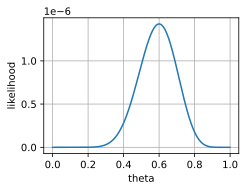

In [69]:
%matplotlib inline
import torch
from d2l import torch as d2l

theta = torch.arange(0, 1, 0.001)
p = theta**num_heads * (1 - theta)**num_tails

d2l.plot(theta, p, 'theta', 'likelihood')

## Numerical Optimization and the Negative Log-Likelihood

The previous example is nice, but what if we have billions of parameters and data examples? Eeach probability is in $[0,1]$, say typically of value about $1/2$, and the product of $(1/2)^{1000000000}$ is far below machine precision:

In [79]:
p1 = 0.5 ** 1000
p2 = 0.5 ** 10000
p3 = 0.5 ** 1000000000
p1, p2, p3

(9.332636185032189e-302, 0.0, 0.0)

However, recall that the logarithm turns products to sums, in which case:

In [85]:
log_p1 = 1000 * torch.log(torch.tensor(0.5))
log_p2 = 10000 * torch.log(torch.tensor(0.5))
log_p3 = 1000000000 * torch.log(torch.tensor(0.5))
log_p1, log_p2, log_p3

(tensor(-693.1472), tensor(-6931.4717), tensor(-6.9315e+08))


Thus, we should consider the *log-likelihood*, which is

$$
\log(P(X \mid \boldsymbol{\theta})).
$$

Maximizing the likelihood is the same thing as maximizing the log-likelihood, or minimizing the *negative log-likelihood*.

To illustrate this, consider the coin flipping problem from before, and pretend that we do not know the closed form solution.  We may compute that

$$
-\log(P(X \mid \boldsymbol{\theta})) = -\log(\theta^{n_H}(1-\theta)^{n_T}) = -(n_H\log(\theta) + n_T\log(1-\theta)).
$$

This can be written into code, and freely optimized even for billions of coin flips.


In [53]:
# Set up our data
n_H = 256243275
n_T = 743756725

# Initialize our paramteres
theta = torch.tensor(0.5, requires_grad=True)

# Perform gradient descent
lr = 0.00000000001
for iter in range(500):
    loss = -(n_H * torch.log(theta) + n_T * torch.log(1 - theta))
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
    theta.grad.zero_()

# Check output
theta, n_H / (n_H + n_T)

(tensor(0.2562, requires_grad=True), 0.256243275)

Congratulations! You have solved your first machine learning problem using gradient descend!

# Homework And Follow-Up Session

Our goal is to present self-contained material during this series of talks. However, our time is limited and there is so much more to learn!

It is not necessary, but we recommend you do some extra homework! 

1) Study this and a SET OF EXTRA NOTEBOOKS we uploaded to the repository https://gitlab.com/HP-SCDS/public/workshops/ml-talks
2) Do as many of the exercises in the extra notebooks as you can!

We will have a follow-up session in two weeks:

1) By email: ask a question, express you doubts, propose a topic for discussion, give as feedback of any kind
2) We will select the most interesting topics to discuss!